# One Hidden Layer Neural Network

## Description

Given a dataset of labeled points in a 2D space that aren't linearly separable, we will build a neural network with a single hidden layer to classify the points.

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

import copy
import sys
sys.path.append('../utils/')
from data_utils import load_planar_data
from viz_utils import *

%matplotlib inline

## Build The Neural Network

In [3]:
# helper functions

# 1- get layer sizes
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y

# 2- the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 3- parameters initialization
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return params

# 4- forward propagation
def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

# 5- cost computation
def compute_cost(A2, Y):
    size = Y.shape[1]
    cost = - (1/size) * np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)))
    return cost

# 6- backward propagation
def backward_prop(parameters, cache, X, Y):
    size = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2 - Y
    dW2 = 1/size * np.dot(dZ2, A1.T)
    db2 = 1/size * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/size * np.dot(dZ1, X.T)
    db1 = 1/size * np.sum(dZ1, axis=1, keepdims=True)
    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    return grads

# 7- updating parameters
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = copy.deepcopy(parameters)['W1']
    b1 = copy.deepcopy(parameters)['b1']
    W2 = copy.deepcopy(parameters)['W2']
    b2 = copy.deepcopy(parameters)['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

# 8- build model
def model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(1)
    n_x, _, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(num_iterations):
        A2, cache = forward_prop(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_prop(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i%1000 == 0:
            print('Cost after iteration %i: %f'%(i, cost))
    return parameters

# 9- make predicions
def predict(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

## Prepare Dataset

In [4]:
X, Y = load_planar_data()

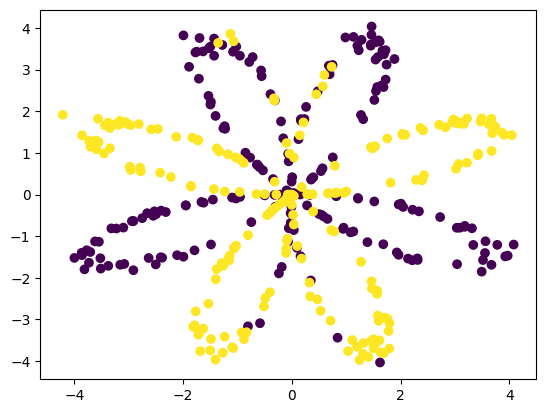

In [5]:
plt.scatter(X[0,:], X[1,:], c=Y)
plt.show()

## Test The Neural Network

In [6]:
parameters = model(X, Y, n_h=4, print_cost=True)

Cost after iteration 0: 0.693117
Cost after iteration 1000: 0.281237
Cost after iteration 2000: 0.268934
Cost after iteration 3000: 0.261963
Cost after iteration 4000: 0.257408
Cost after iteration 5000: 0.254261
Cost after iteration 6000: 0.251984
Cost after iteration 7000: 0.250272
Cost after iteration 8000: 0.248945
Cost after iteration 9000: 0.247890


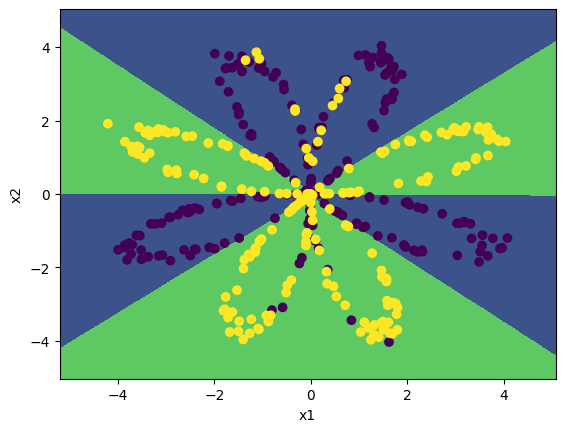

In [7]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

We notice here that eventhough the points aren't linearly separable, the neural network is able to classify them correctly.